In [2]:
import torch
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../src")) 

if project_root not in sys.path:
    sys.path.append(project_root)

print(sys.path)

['/home/diego/miniconda3/envs/tensorflow/lib/python311.zip', '/home/diego/miniconda3/envs/tensorflow/lib/python3.11', '/home/diego/miniconda3/envs/tensorflow/lib/python3.11/lib-dynload', '', '/home/diego/.local/lib/python3.11/site-packages', '/home/diego/miniconda3/envs/tensorflow/lib/python3.11/site-packages', '/home/diego/Documents/PythonProjects/training_models_PI/src']


In [4]:
from utils import applySplit

In [2]:
df_data = pd.read_csv("../raw_data/protein_solubility/processed_data_to_train.csv")
df_data.head(5)

,sequence,response,length,is_in_selected
0,MLYSLVKKYLFSLDAEIAHEKVCQILRTLSSSPFLCRLIHSQWGYK...,97.0,351,1
1,MTILNHTLGFPRVGLRRELKKAQESYWAGNSTREELLAVGRELRAR...,100.0,753,1
2,MSKFSFTIHSNYKKARSGVITTAHGKIRTPTFMPVGTRGTVKAMLT...,57.0,361,1
3,MKRAVVVFSGGQDSTTCLIQALHQYDEVHCVTFDYGQRHRAEIDVA...,99.0,231,1
4,MSEIVTYEDALKDFEPIIGLEVHVELSTQTKLFSSAPNIAGPLASC...,86.0,504,1


In [3]:
df_data = df_data[["sequence", "response"]]
df_data.head()

,sequence,response
0,MLYSLVKKYLFSLDAEIAHEKVCQILRTLSSSPFLCRLIHSQWGYK...,97.0
1,MTILNHTLGFPRVGLRRELKKAQESYWAGNSTREELLAVGRELRAR...,100.0
2,MSKFSFTIHSNYKKARSGVITTAHGKIRTPTFMPVGTRGTVKAMLT...,57.0
3,MKRAVVVFSGGQDSTTCLIQALHQYDEVHCVTFDYGQRHRAEIDVA...,99.0
4,MSEIVTYEDALKDFEPIIGLEVHVELSTQTKLFSSAPNIAGPLASC...,86.0


<Axes: xlabel='response', ylabel='Count'>

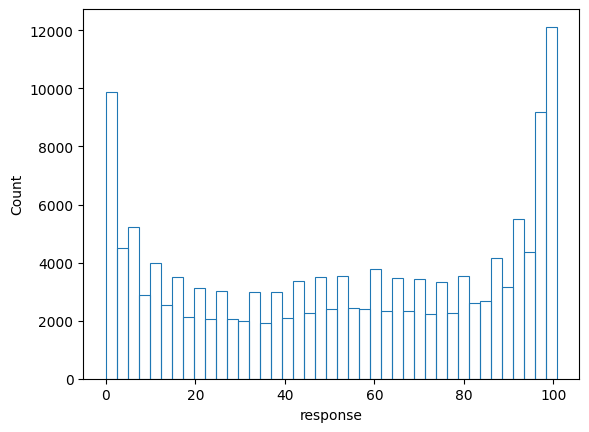

In [4]:
sns.histplot(data=df_data, x="response", fill=False)

In [5]:
train_data, test_data = train_test_split(df_data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [6]:
train_data["source"] = "Train"
test_data["source"] = "Test"
val_data["source"] = "Validation"

full_data = pd.concat([train_data, test_data, val_data], axis=0)

<Axes: xlabel='response', ylabel='Count'>

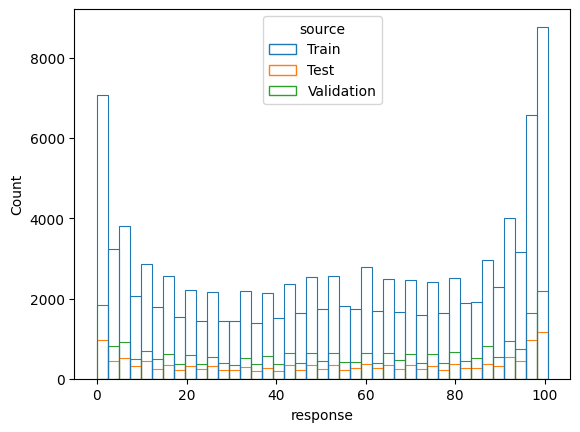

In [7]:
sns.histplot(data=full_data, x="response", hue="source", fill=False)

In [8]:
train_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/train_data.csv", index=False)
val_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/val_data.csv", index=False)
test_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/test_data.csv", index=False)


## Example of data with a npz

In [46]:
df_data = pd.read_csv("../processed_dataset/antimicrobial/described_dataset.csv")
df_data.head(5)

,label,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,0,1599.84,3.6875,-0.00142,-2.271,80.3800,0.0000,78.0000,1.0227,0.5333,...,0.0667,0.0000,0.0000,0.0667,0.0000,0.0000,0.0667,0.0667,0.0,0.0000
1,0,5854.57,11.8838,0.00087,5.094,28.6796,0.0741,67.0370,1.7772,0.3704,...,0.0741,0.0370,0.0370,0.0926,0.0556,0.0926,0.1111,0.0370,0.0,0.0185
2,1,1599.84,11.1055,0.00250,3.997,8.1400,0.0000,58.6667,3.2153,0.2667,...,0.0667,0.0000,0.0000,0.0000,0.0667,0.0667,0.0000,0.0667,0.0,0.0000
3,1,1432.67,3.9297,-0.00070,-1.003,3.2214,0.0714,167.1429,-1.0714,0.7143,...,0.1429,0.0000,0.0000,0.0000,0.0000,0.0000,0.0714,0.2857,0.0,0.0714
4,0,4971.40,4.6431,-0.00056,-2.801,100.1833,0.0208,68.9583,1.4767,0.2708,...,0.0208,0.0208,0.1042,0.0417,0.0000,0.2708,0.1250,0.0833,0.0,0.0000


In [47]:
embeddings = np.load("../processed_dataset/antimicrobial/ankh2-ext1.npz")
embeddings["embeddings"].shape

(3000, 1536)

In [48]:
#append the new data to the existing dataset
df_data = df_data[:3000]
df_data = pd.concat([df_data, pd.DataFrame(embeddings['embeddings'])], axis=1)
df_data.head(5)

,label,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,0,1599.84,3.6875,-0.00142,-2.271,80.3800,0.0000,78.0000,1.0227,0.5333,...,-0.027932,0.057240,0.010194,0.043303,0.005291,0.011017,-0.019488,-0.040302,-0.018599,0.016319
1,0,5854.57,11.8838,0.00087,5.094,28.6796,0.0741,67.0370,1.7772,0.3704,...,-0.007617,0.052387,-0.010383,0.029401,-0.003568,-0.016274,0.007349,-0.002031,-0.023635,0.027730
2,1,1599.84,11.1055,0.00250,3.997,8.1400,0.0000,58.6667,3.2153,0.2667,...,-0.034917,0.081618,0.001822,-0.011498,0.027947,0.011096,-0.048152,-0.074415,-0.040764,0.030882
3,1,1432.67,3.9297,-0.00070,-1.003,3.2214,0.0714,167.1429,-1.0714,0.7143,...,-0.029208,0.036262,0.010416,0.028957,-0.018632,0.004347,-0.049811,-0.049061,-0.036166,0.023941
4,0,4971.40,4.6431,-0.00056,-2.801,100.1833,0.0208,68.9583,1.4767,0.2708,...,-0.032218,0.050233,0.000915,0.022297,-0.017786,-0.021135,-0.025630,-0.002875,-0.005630,0.011497


In [49]:
response = df_data["label"].values
df_data.drop(columns=["label"], inplace=True)

In [50]:
response.shape

(3000,)

In [51]:
X_train, X_val, X_test, y_train, y_val, y_test = applySplit(df_data.to_numpy(), response, 0.1, 0.2, 42)

In [52]:
X_train[6:10]

array([[ 3.77336000e+03,  1.18516000e+01,  1.31000000e-03, ...,
        -4.92041372e-02, -3.97522822e-02,  2.77288780e-02],
       [ 1.55793000e+03,  1.30781000e+01,  2.56000000e-03, ...,
        -3.33517529e-02, -2.06583161e-02,  6.02977071e-03],
       [ 7.91603000e+03,  1.00222000e+01,  8.80000000e-04, ...,
         1.74847664e-03, -8.84498470e-03,  3.23490426e-03],
       [ 2.32281000e+03,  6.05760000e+00, -3.50000000e-04, ...,
         9.25119501e-03, -2.89923809e-02, -4.90761921e-03]])

In [53]:
np.savez_compressed(
    "../processed_dataset/antimicrobial/train_data.npz", 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_val, 
    y_val=y_val, 
    X_test=X_test, 
    y_test=y_test
)

### Regression

In [30]:
df_data = pd.read_csv("../processed_dataset/protein_solubility/described_dataset.csv")
df_data.head(5)

,response,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,27.0,16871.20,7.1816,0.00001,0.166,19.2439,0.0701,74.0127,1.0715,0.3885,...,0.0764,0.0573,0.0255,0.0510,0.0127,0.0828,0.1083,0.0573,0.0191,0.0127
1,92.0,55715.65,9.1447,0.00023,13.030,50.7540,0.1192,84.6653,1.7803,0.3745,...,0.1213,0.0167,0.0607,0.0397,0.0732,0.0649,0.0502,0.0565,0.0251,0.0356
2,99.0,39694.88,10.2913,0.00041,16.172,39.6469,0.0566,110.9704,1.0400,0.4528,...,0.1213,0.0081,0.0512,0.0539,0.0889,0.0296,0.0458,0.1051,0.0054,0.0296
3,3.0,36757.46,5.5354,-0.00018,-6.739,34.9370,0.1553,70.2174,1.2689,0.3634,...,0.0342,0.0280,0.0652,0.0311,0.0435,0.0497,0.0528,0.0714,0.0280,0.0590
4,1.0,47277.39,5.2434,-0.00024,-11.549,29.2717,0.0876,80.8065,1.5192,0.3387,...,0.0760,0.0161,0.0346,0.0369,0.0346,0.0853,0.0783,0.0806,0.0161,0.0415


In [31]:
embeddings = np.load("../processed_dataset/protein_solubility/ankh2-ext1.npz")
embeddings["embeddings"].shape

(3000, 1536)

In [32]:
#append the new data to the existing dataset
df_data = df_data[:3000]
df_data = pd.concat([df_data, pd.DataFrame(embeddings['embeddings'])], axis=1)
df_data.head(10)

,response,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,27.0,16871.20,7.1816,0.00001,0.166,19.2439,0.0701,74.0127,1.0715,0.3885,...,-0.041361,0.061604,0.016672,0.043670,-0.015707,0.006745,0.063038,-0.023068,-0.019504,0.040823
1,92.0,55715.65,9.1447,0.00023,13.030,50.7540,0.1192,84.6653,1.7803,0.3745,...,-0.019049,0.070578,-0.001693,-0.003402,0.000866,-0.001106,-0.114861,-0.073722,-0.013330,0.033590
2,99.0,39694.88,10.2913,0.00041,16.172,39.6469,0.0566,110.9704,1.0400,0.4528,...,-0.036311,0.070825,0.004207,0.002299,0.002132,-0.002202,-0.086585,-0.058554,-0.023240,0.037519
3,3.0,36757.46,5.5354,-0.00018,-6.739,34.9370,0.1553,70.2174,1.2689,0.3634,...,-0.038526,0.083643,0.012314,0.007664,0.004939,-0.009440,-0.100371,-0.058063,-0.022119,0.042229
4,1.0,47277.39,5.2434,-0.00024,-11.549,29.2717,0.0876,80.8065,1.5192,0.3387,...,-0.014642,0.065101,0.001391,-0.008528,0.003987,-0.008446,-0.200479,-0.070804,-0.013392,0.046856
5,43.0,27223.62,4.1005,-0.00083,-22.572,43.8408,0.0560,84.7200,2.1453,0.3360,...,-0.039949,0.081936,0.014647,0.032878,-0.014683,0.006027,-0.006579,-0.068276,-0.031202,0.047979
6,1.0,47690.47,6.1449,-0.00011,-5.219,25.3121,0.0517,95.5506,1.2502,0.4247,...,-0.023596,0.060481,0.005853,-0.002719,-0.000103,-0.007820,-0.105943,-0.053123,-0.017937,0.038396
7,99.0,54435.72,7.8960,0.00005,2.597,41.8376,0.1098,91.8089,1.0375,0.4207,...,-0.021215,0.078942,0.007473,-0.020626,0.005793,-0.006386,-0.195350,-0.104109,-0.011701,0.036566
8,12.0,73535.78,4.6800,-0.00032,-23.258,38.2458,0.1051,81.4683,1.7573,0.3802,...,-0.020007,0.035502,-0.003268,-0.006770,0.010923,-0.001375,-0.051989,-0.028192,-0.008027,0.020320
9,2.0,86942.61,5.2859,-0.00020,-17.179,42.2864,0.0830,94.0986,1.6892,0.4202,...,-0.001201,0.011798,-0.000816,0.002378,-0.001130,-0.007887,0.028154,0.007060,0.011497,0.003060


In [34]:
response = df_data["response"].values
df_data.drop(columns=["response"], inplace=True)

In [35]:
response.shape

(3000,)

In [36]:
X_train, X_val, X_test, y_train, y_val, y_test = applySplit(df_data.to_numpy(), response, 0.1, 0.2, 42)

In [37]:
X_train[6:10]

array([[ 4.53191800e+04,  6.71390000e+00, -1.00000000e-05, ...,
         1.09777031e-02,  1.38799725e-02,  4.43656184e-03],
       [ 4.40944300e+04,  6.26420000e+00, -7.00000000e-05, ...,
        -6.68613911e-02, -1.61827989e-02,  3.78885455e-02],
       [ 1.82731100e+04,  9.58200000e+00,  2.30000000e-04, ...,
        -4.63491343e-02, -2.76353937e-02,  3.73126045e-02],
       [ 4.82985000e+04,  5.84510000e+00, -1.40000000e-04, ...,
        -7.42324889e-02, -2.16719247e-02,  3.73945460e-02]])

In [38]:
np.savez_compressed(
    "../processed_dataset/protein_solubility/train_data.npz", 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_val, 
    y_val=y_val, 
    X_test=X_test, 
    y_test=y_test
)